In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
1

1

In [7]:
from hypergraph_generator import generate_hypergraph
from agent_country import run, run_parallel

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
graph_args={'name': 'd_regular', 'args': {'n':1000, 'd':2,'edge size':5, 'distribution':'uniform'}}
data_het = run_parallel(graph_args, betas=np.arange(0.1,0.6,0.2), qs=np.arange(0,1,0.2),rs=[0.5], ws=[0.5], endtime=100000,move='majority', iterations=20, processes=50,log_freq=1000, save=False)

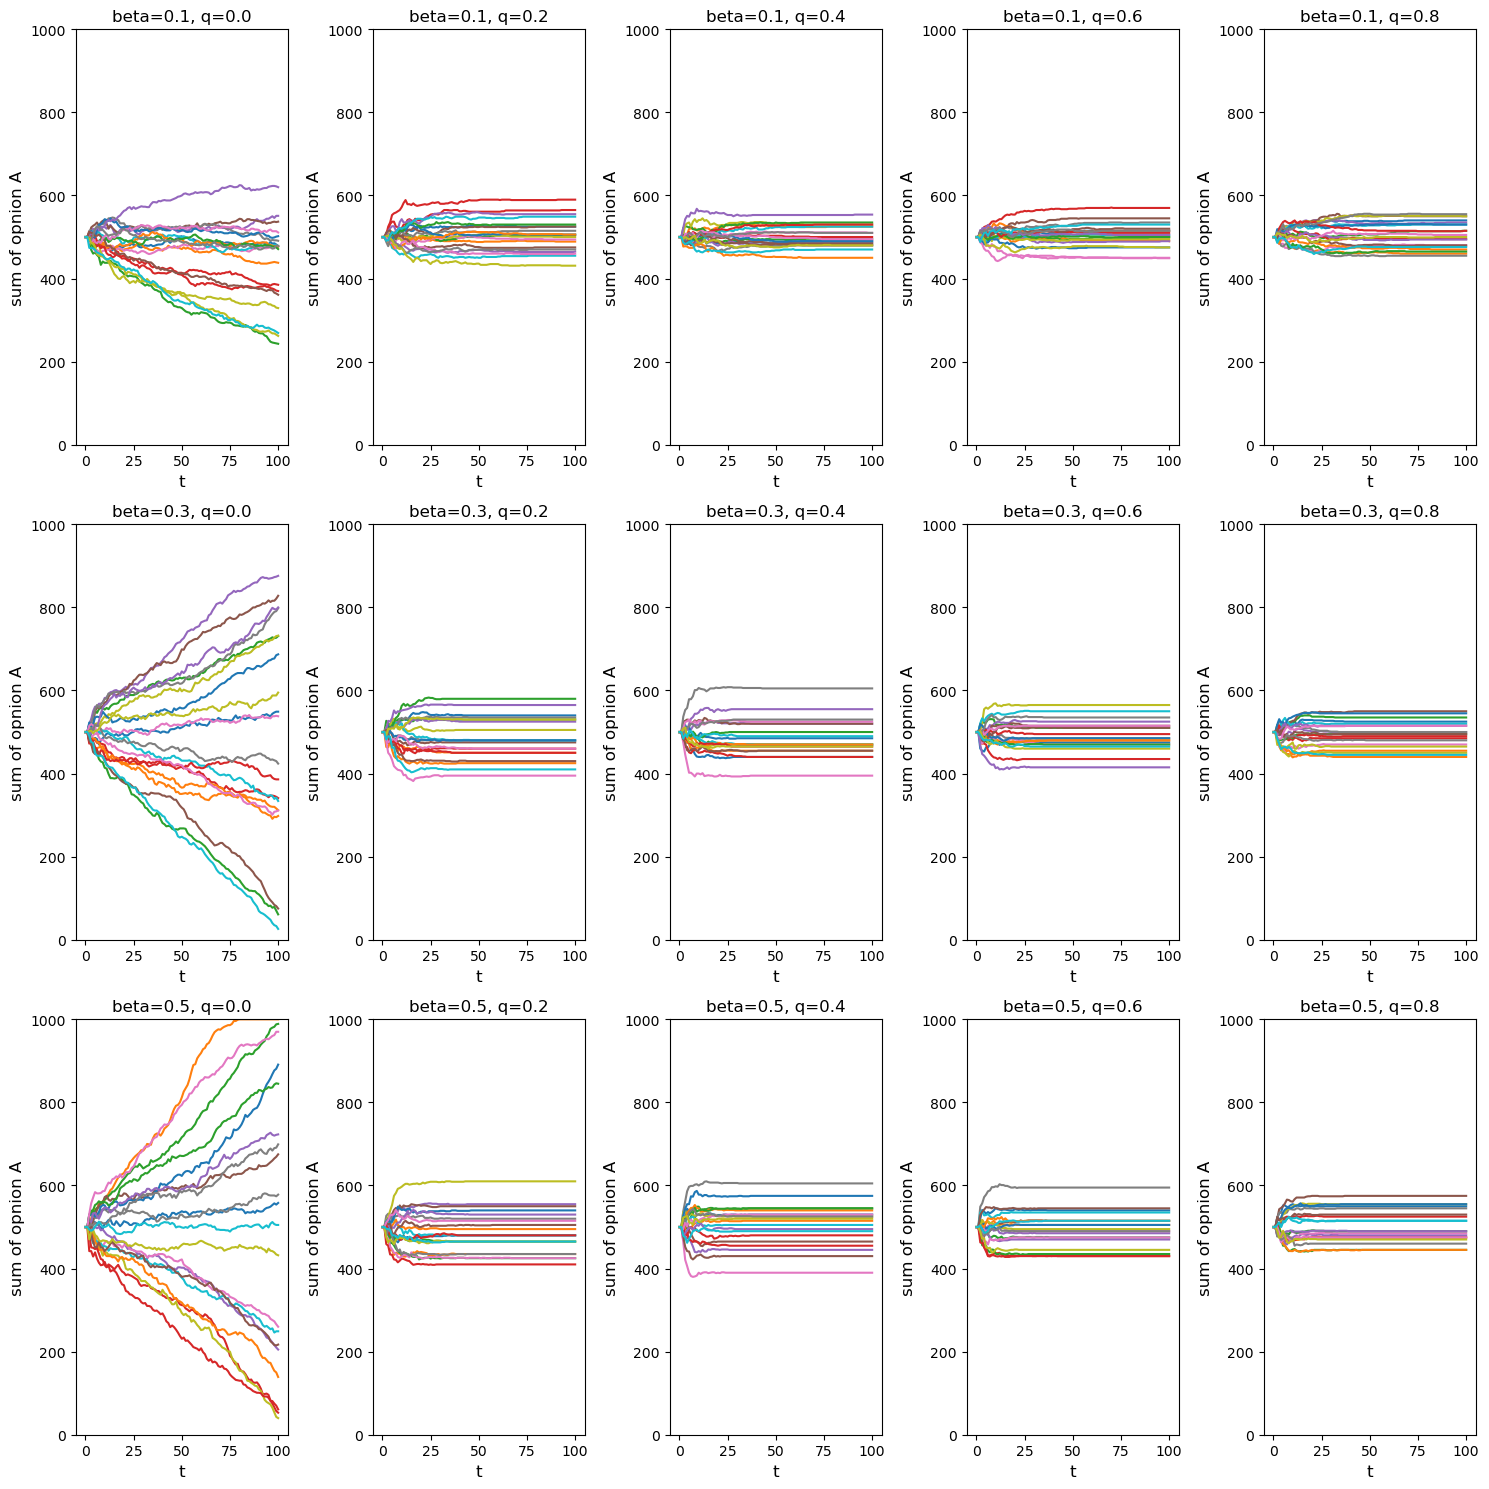

In [14]:
betas=np.arange(0.1,0.6,0.2)
qs=np.arange(0,1,0.2)
iterations=20
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data_het[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results[it]['sum_opinion_A'])
        ax.set_ylabel('sum of opnion A',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,1000))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


In [ ]:
iterations = 20
betas=np.arange(0.1,1,0.2)
qs=np.arange(0.1,1,0.2)

In [12]:
len(data)

5

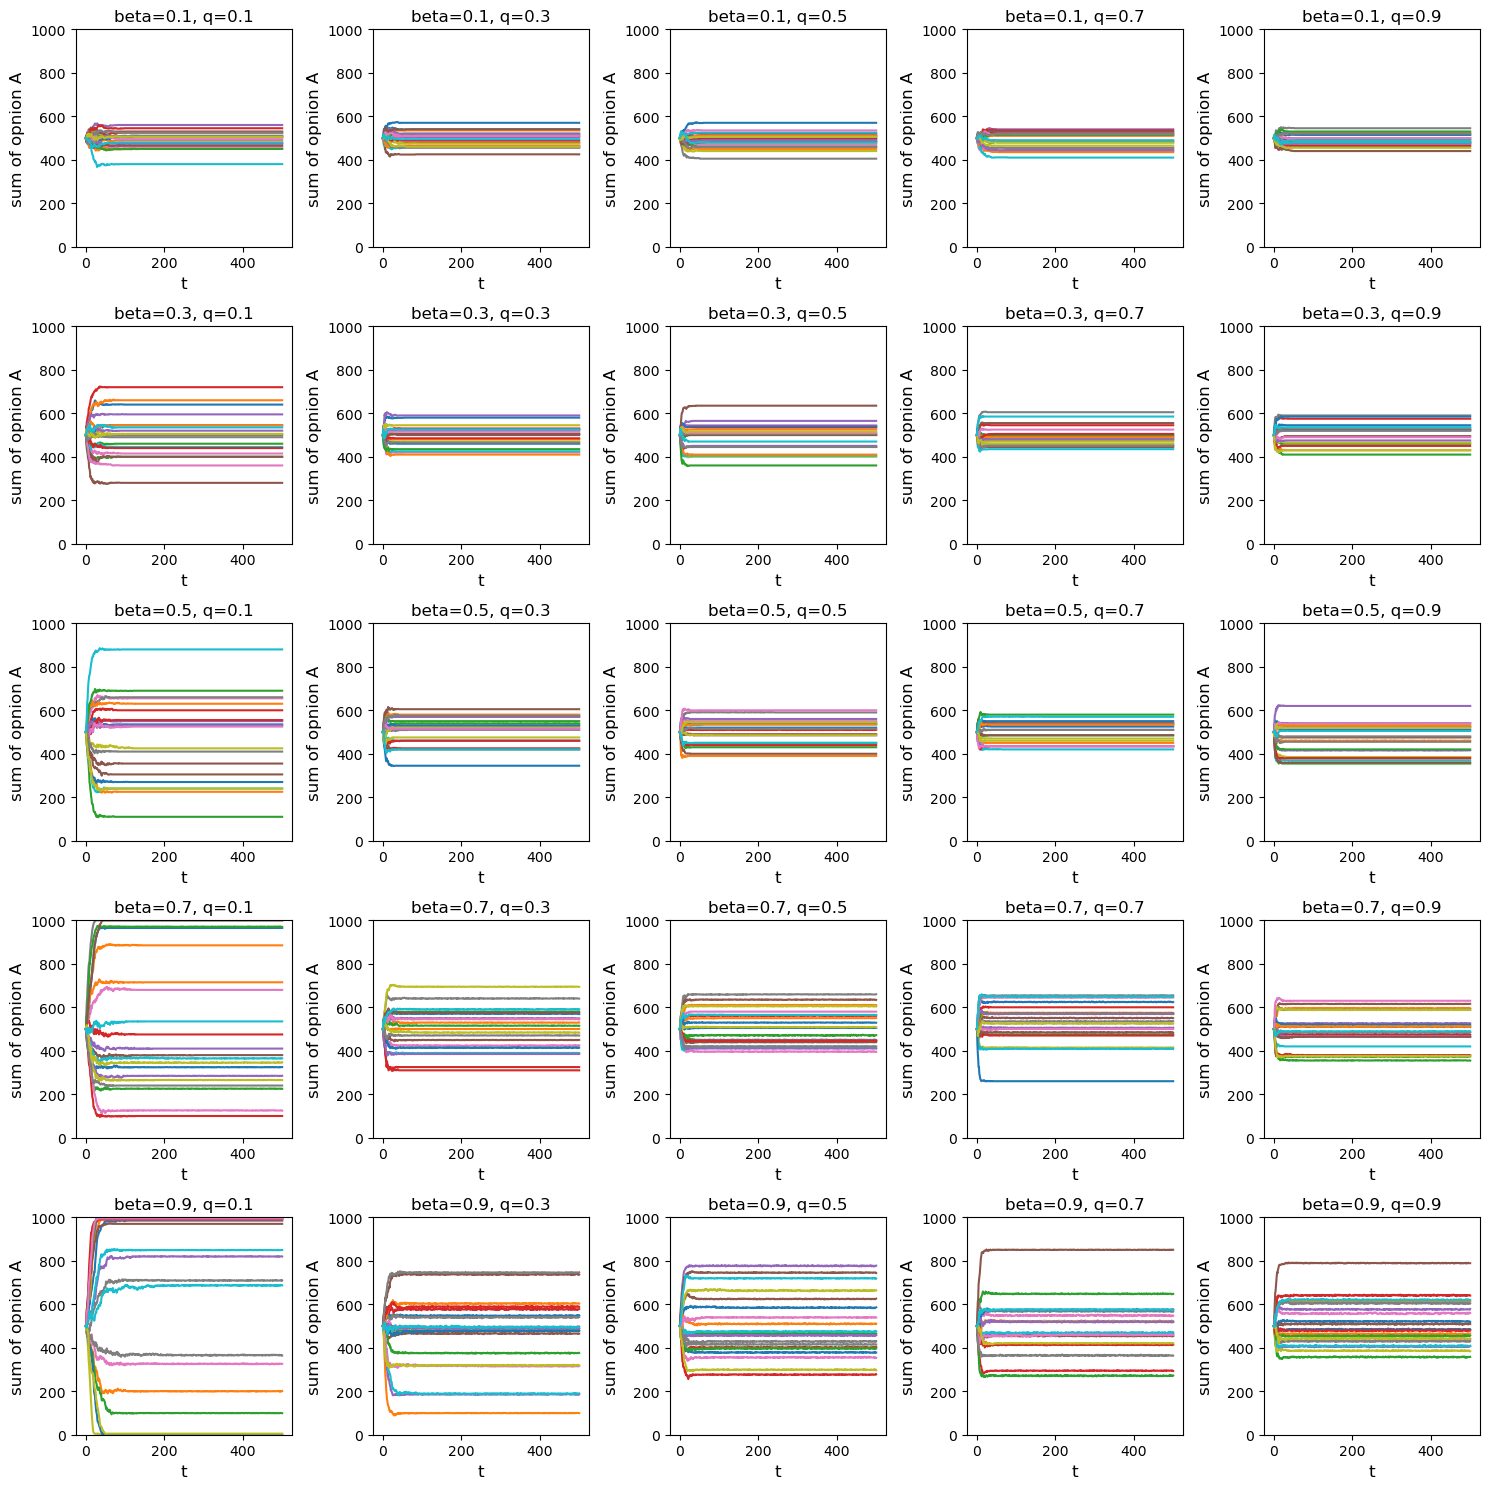

In [105]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results[it]['sum_opinion_A'])
        ax.set_ylabel('sum of opnion A',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,1000))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


In [18]:
import seaborn as sns

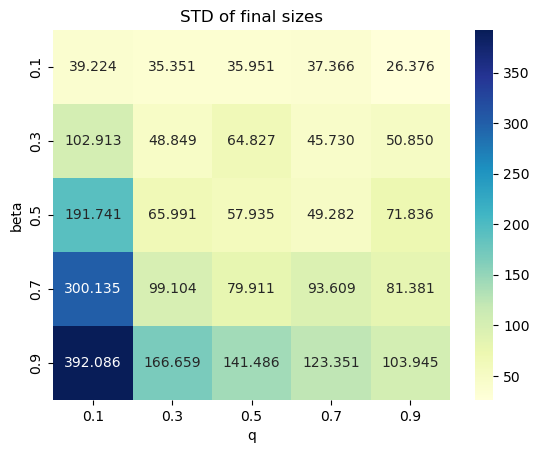

In [29]:
fd_mtx=np.zeros((5,5))
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        s = np.std([data[i][j][it]['sum_opinion_A'][-1] for it in range(iterations)])
        
        fd_mtx[i][j]=s
x = [f'{q:.1f}' for q in qs]
y = [f'{beta:.1f}' for beta in betas]
sns.heatmap(fd_mtx,xticklabels=x, yticklabels=y, cmap="YlGnBu", cbar=True,annot=True, fmt='.3f')

plt.xlabel("q")
plt.ylabel("beta")
plt.title("STD of final sizes")
plt.show()

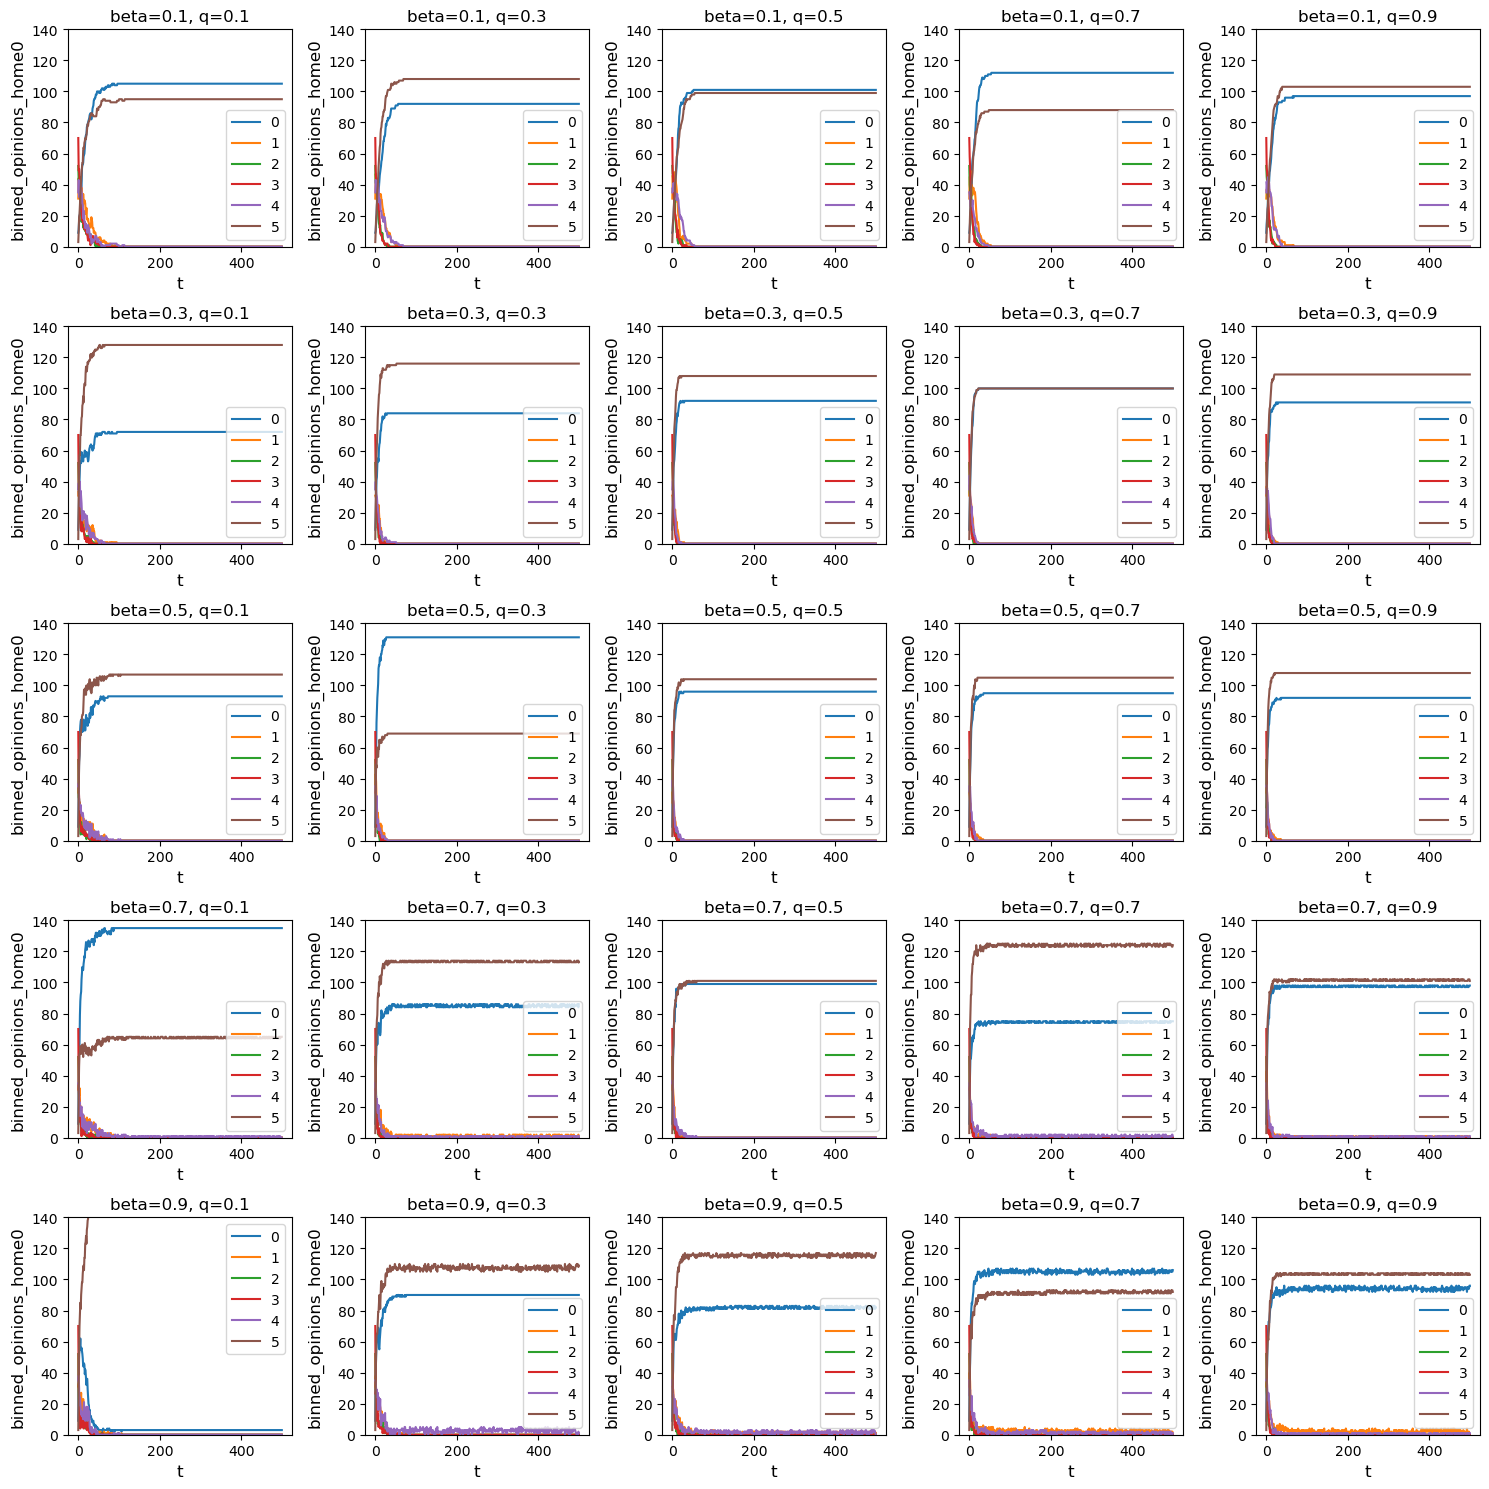

In [109]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        ax.plot([results[0]['binned_opinions_home'][k] for k in range(len(results[it]['binned_opinions_home']))], label=np.arange(6))
        ax.legend()
        ax.set_ylabel('binned_opinions_home0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,140))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


In [33]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

#color pinterest
S_color=(inter_from_256(231),inter_from_256(197),inter_from_256(108))
I_color=(inter_from_256(189),inter_from_256(108),inter_from_256(78))
SI_color=(inter_from_256(86),inter_from_256(141),inter_from_256(162))
colors=[S_color,I_color,SI_color]

In [39]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [60]:
data[0][0][it]['binned_opinions_home'][0][-1]

4

In [66]:
len(data[0][0][0]['binned_opinions_home'][0])

6

In [61]:
len(data_mean)

500

In [89]:
fs=12
ts=10
def hyperedge_opinions(data,row='binned_opinions_home', color_i=0, typeofedges='home'):
    fig, axes = plt.subplots(len(betas),len(qs), figsize=(30,30))
    axes=axes.flatten()
    k=0
    for i in range(len(betas)):
        beta=betas[i]
        for j in range(len(qs)):
            results=data[i][j]
            ax=axes[k]
            
            q=qs[j]
            
            data_mean=[]
            data_error=[]
            #print(beta,q)
            ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
            for l in range(len(results[0][row][0])):
                datas=[results[it][row][-1][l] for it in range(iterations)]
                m =mean_confidence_interval(datas,0.95)
                data_mean.append(m[0])
                data_error.append(m[1])
            ax.bar(np.arange(len(results[0][row][0])), data_mean, 0.8, label=None, color=colors[color_i],edgecolor = 'black',yerr=data_error, capsize=4,)
            # Customize the second subplot
            ax.set_ylim(0,150)
            if typeofedges=='home':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'# persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(len(results[0][row][0])))
                
            elif typeofedges=='workplace':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'rate of persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(0,len(results[0][row][0]),2), (np.arange(0,len(results[row]),2)+1)/10)
            else:
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'size', fontsize=fs)
                ax.set_xticks(np.arange(len(results[0][row][0])+1))
                ax.set_ylim((0,150))
            ax.tick_params(axis='both', labelsize=ts)# Example categories
            
            k+=1
    plt.tight_layout()

In [72]:
len(data)

5

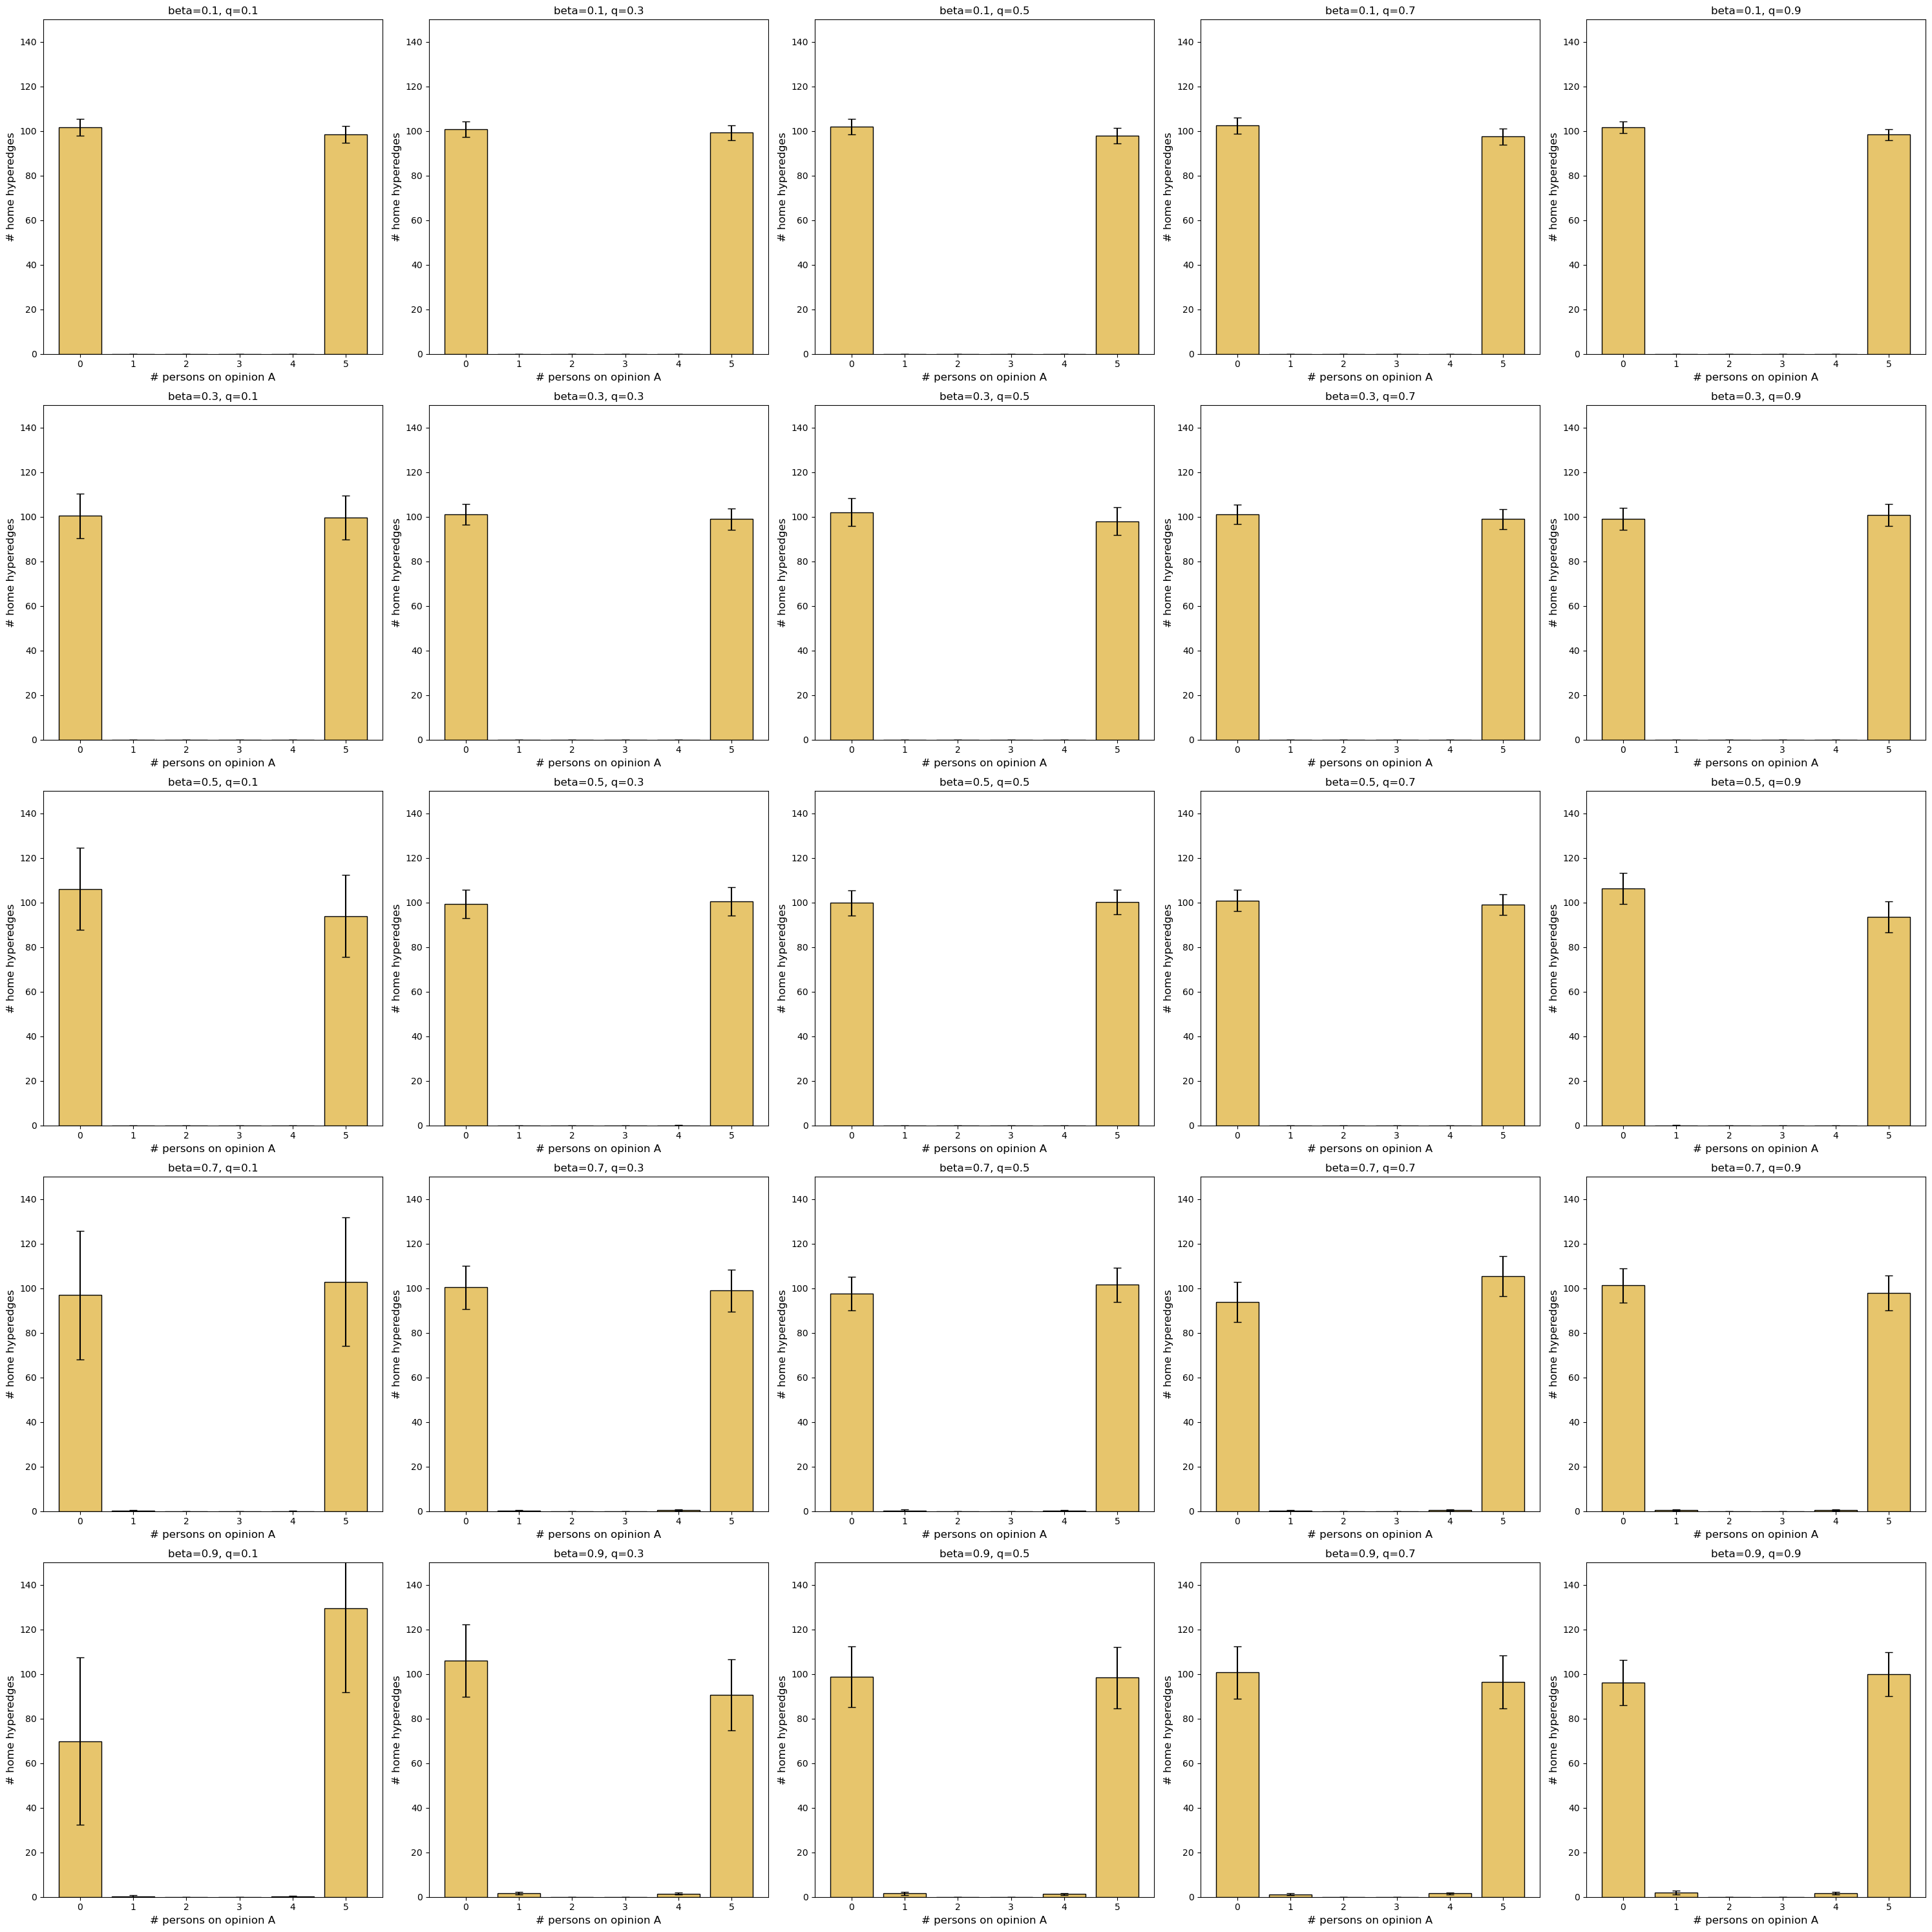

In [90]:
hyperedge_opinions(data,row='binned_opinions_home', color_i=0)

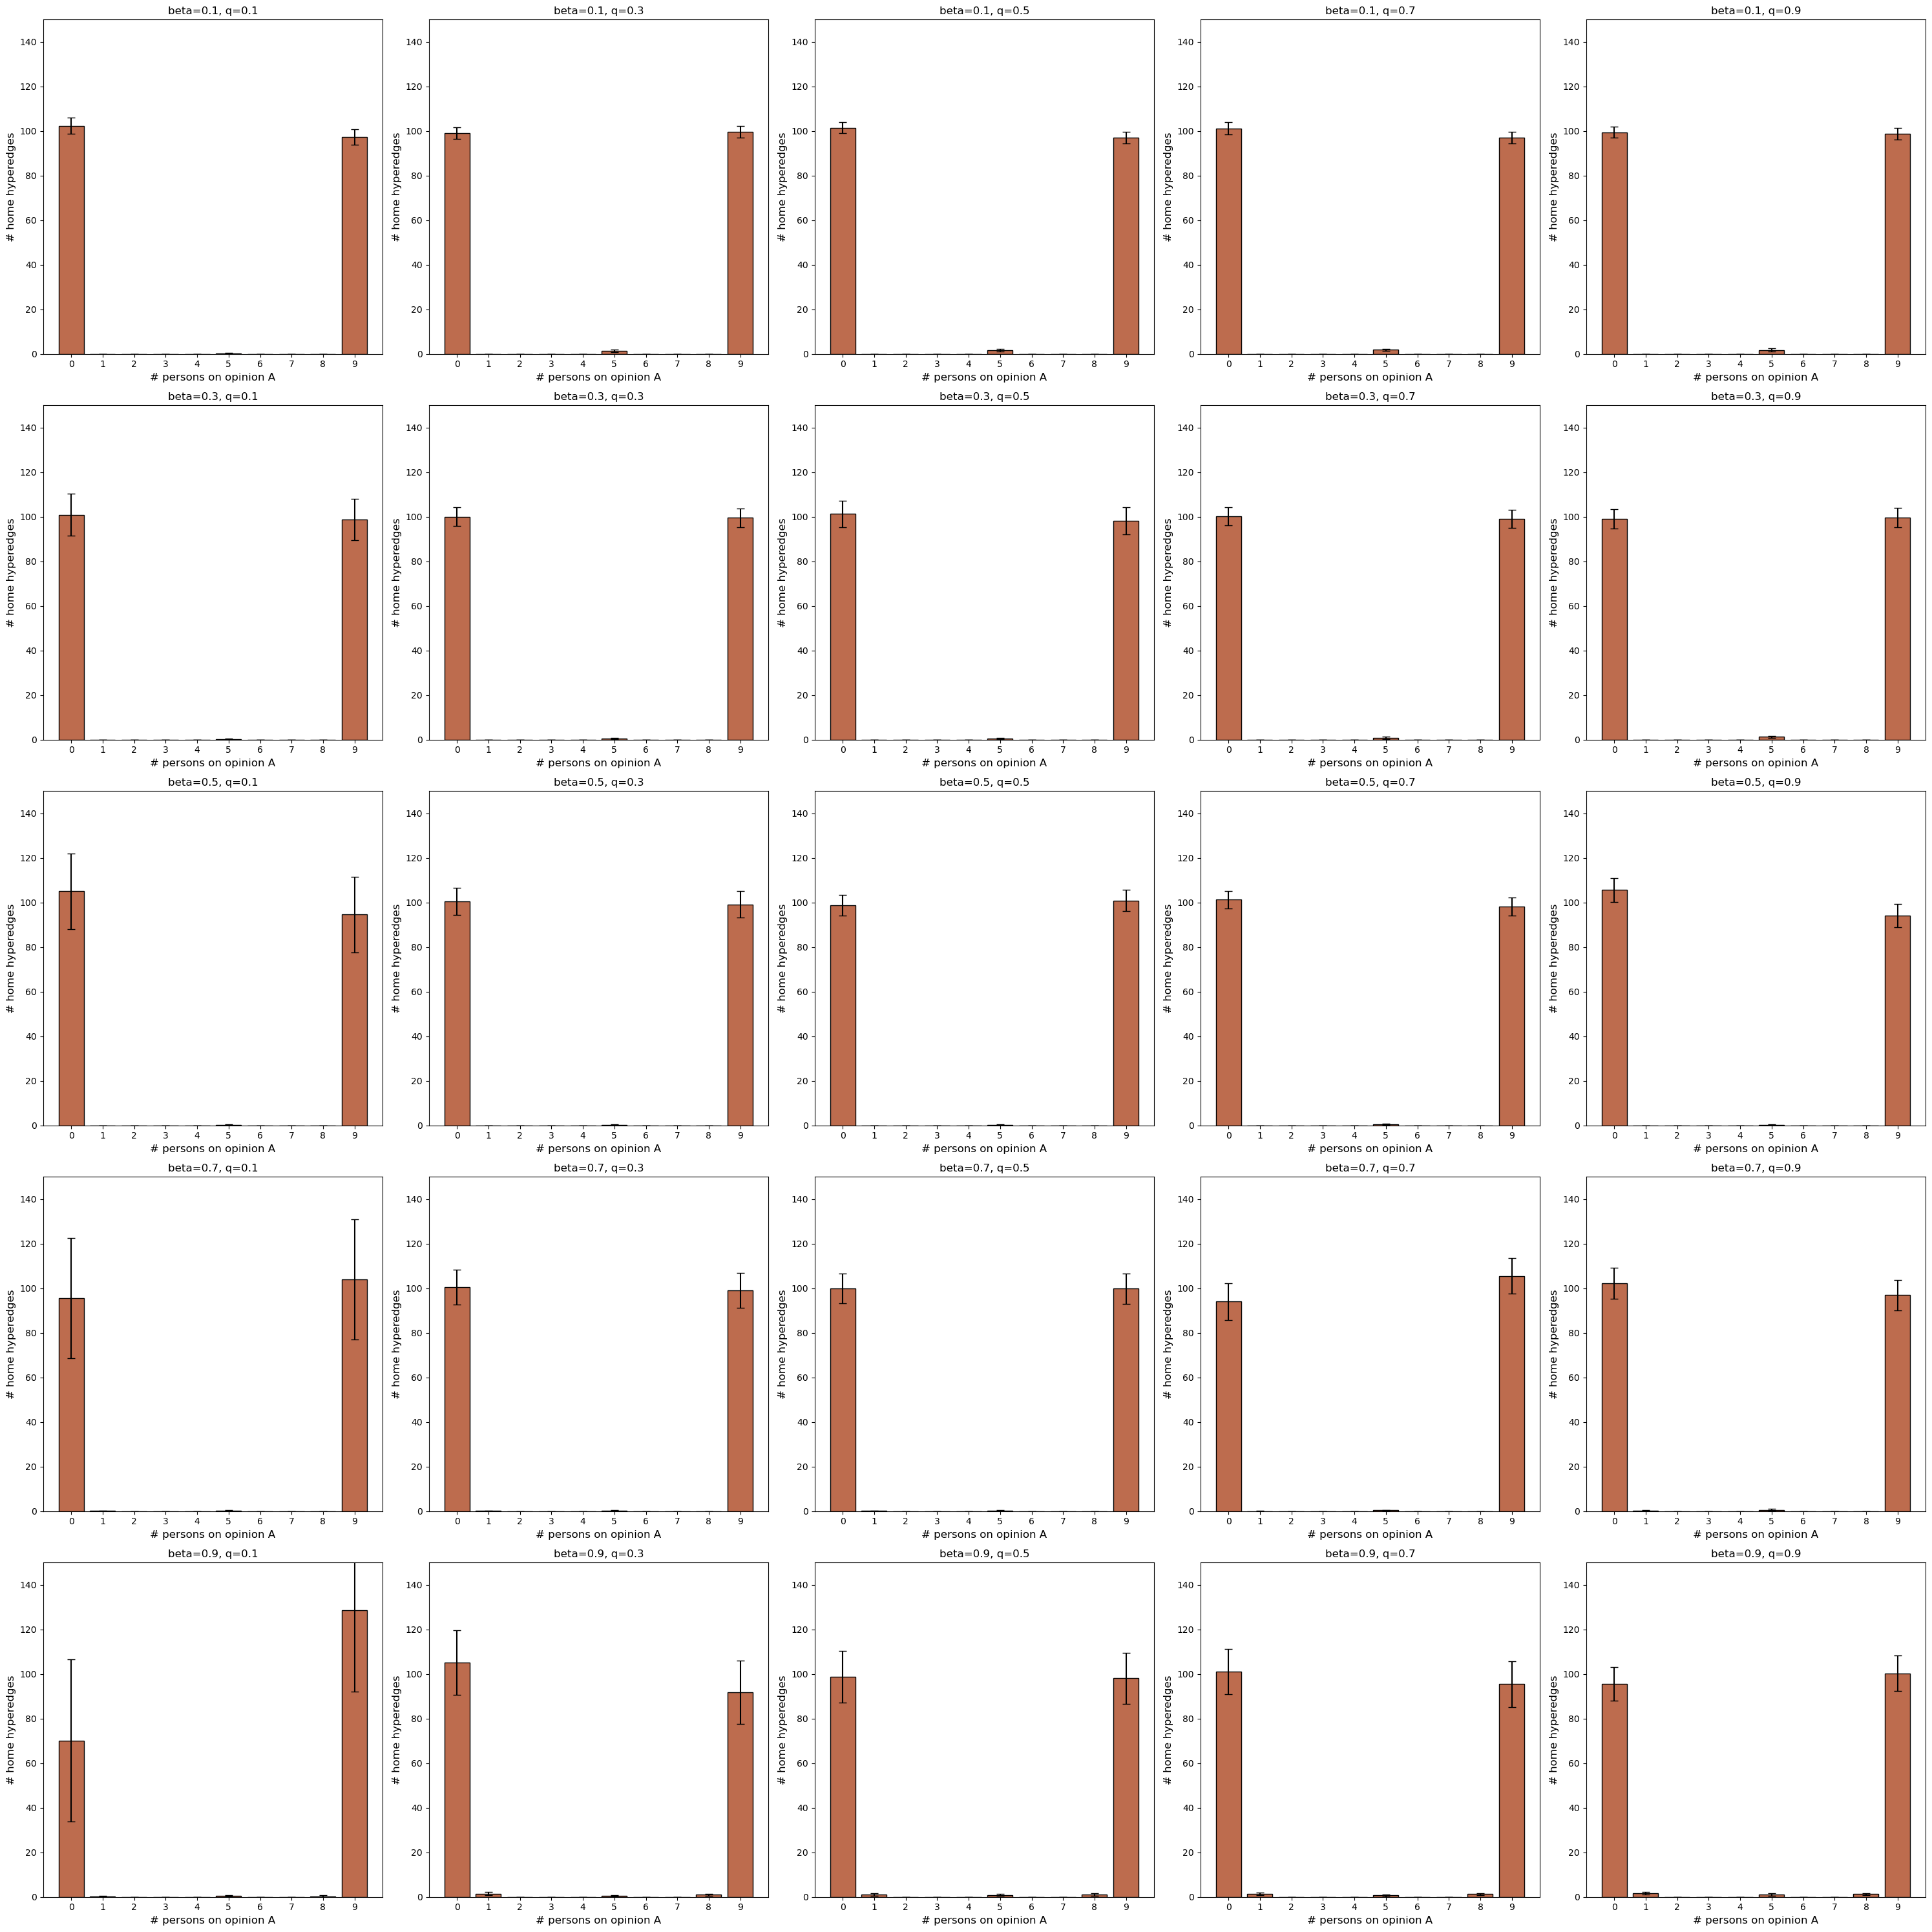

In [92]:
hyperedge_opinions(data,row='binned_opinions_wp', color_i=1)

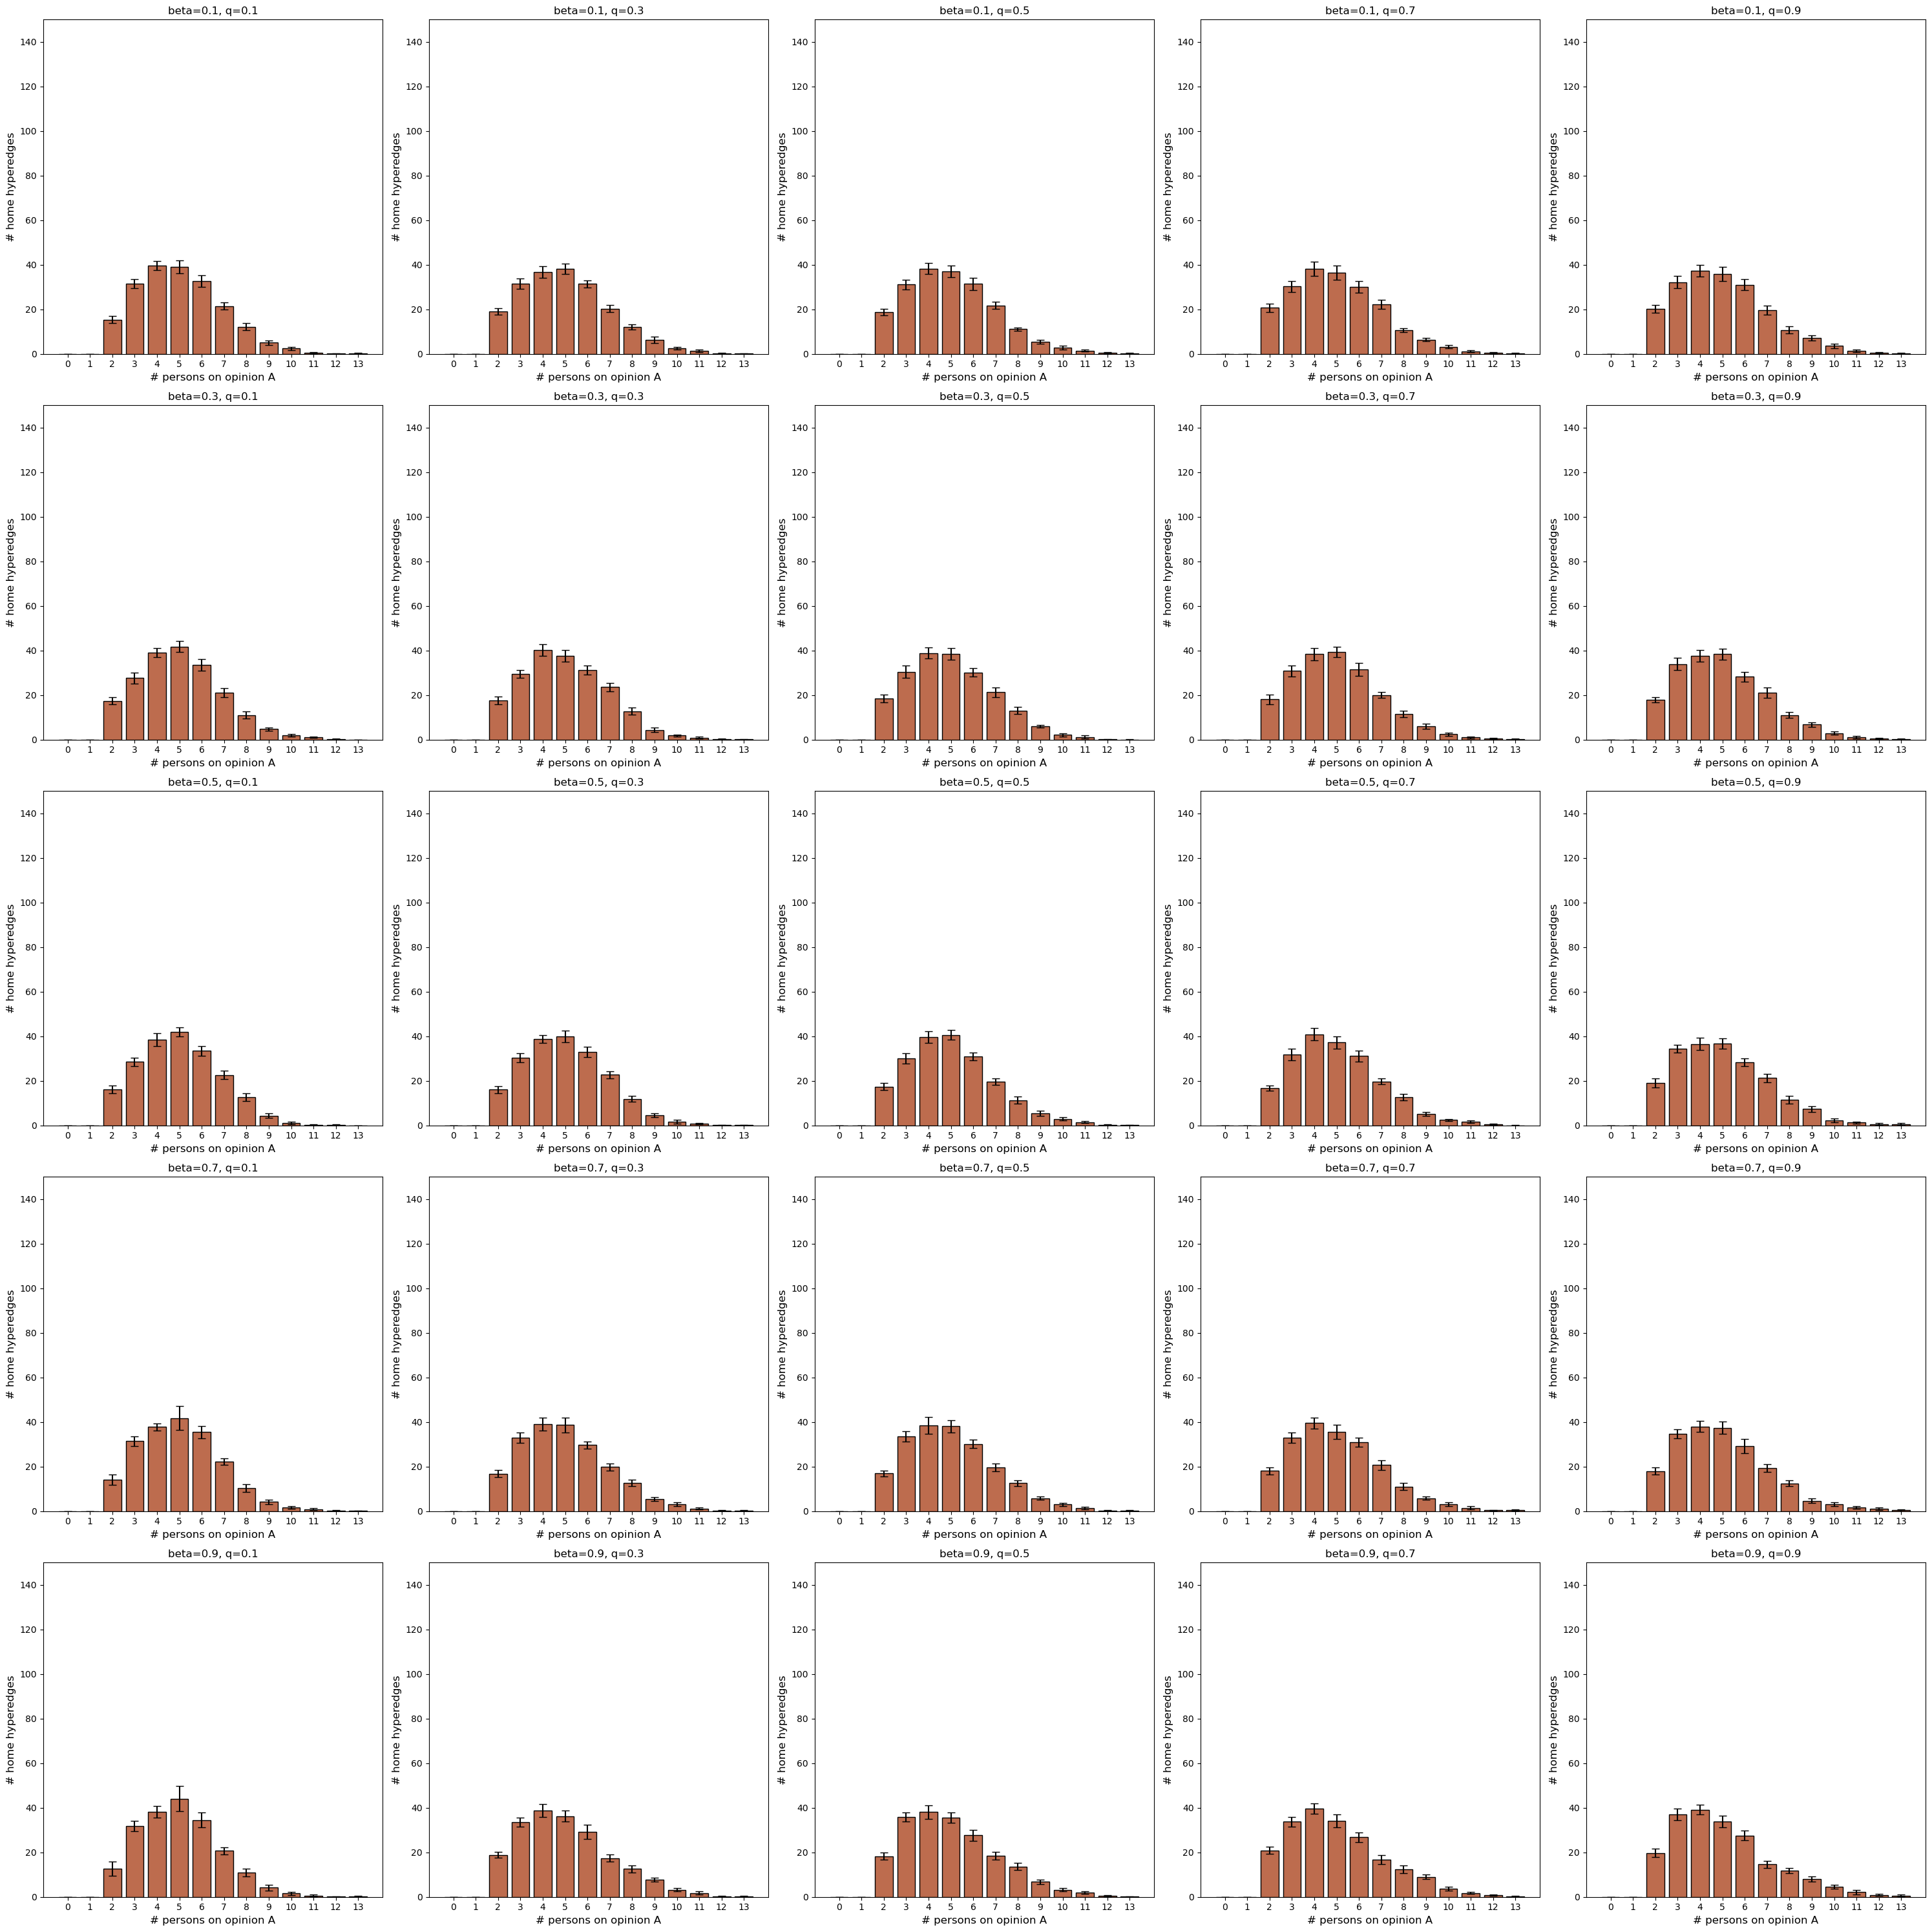

In [102]:
hyperedge_opinions(data,row='binned_edge_sizes_wp', color_i=1)

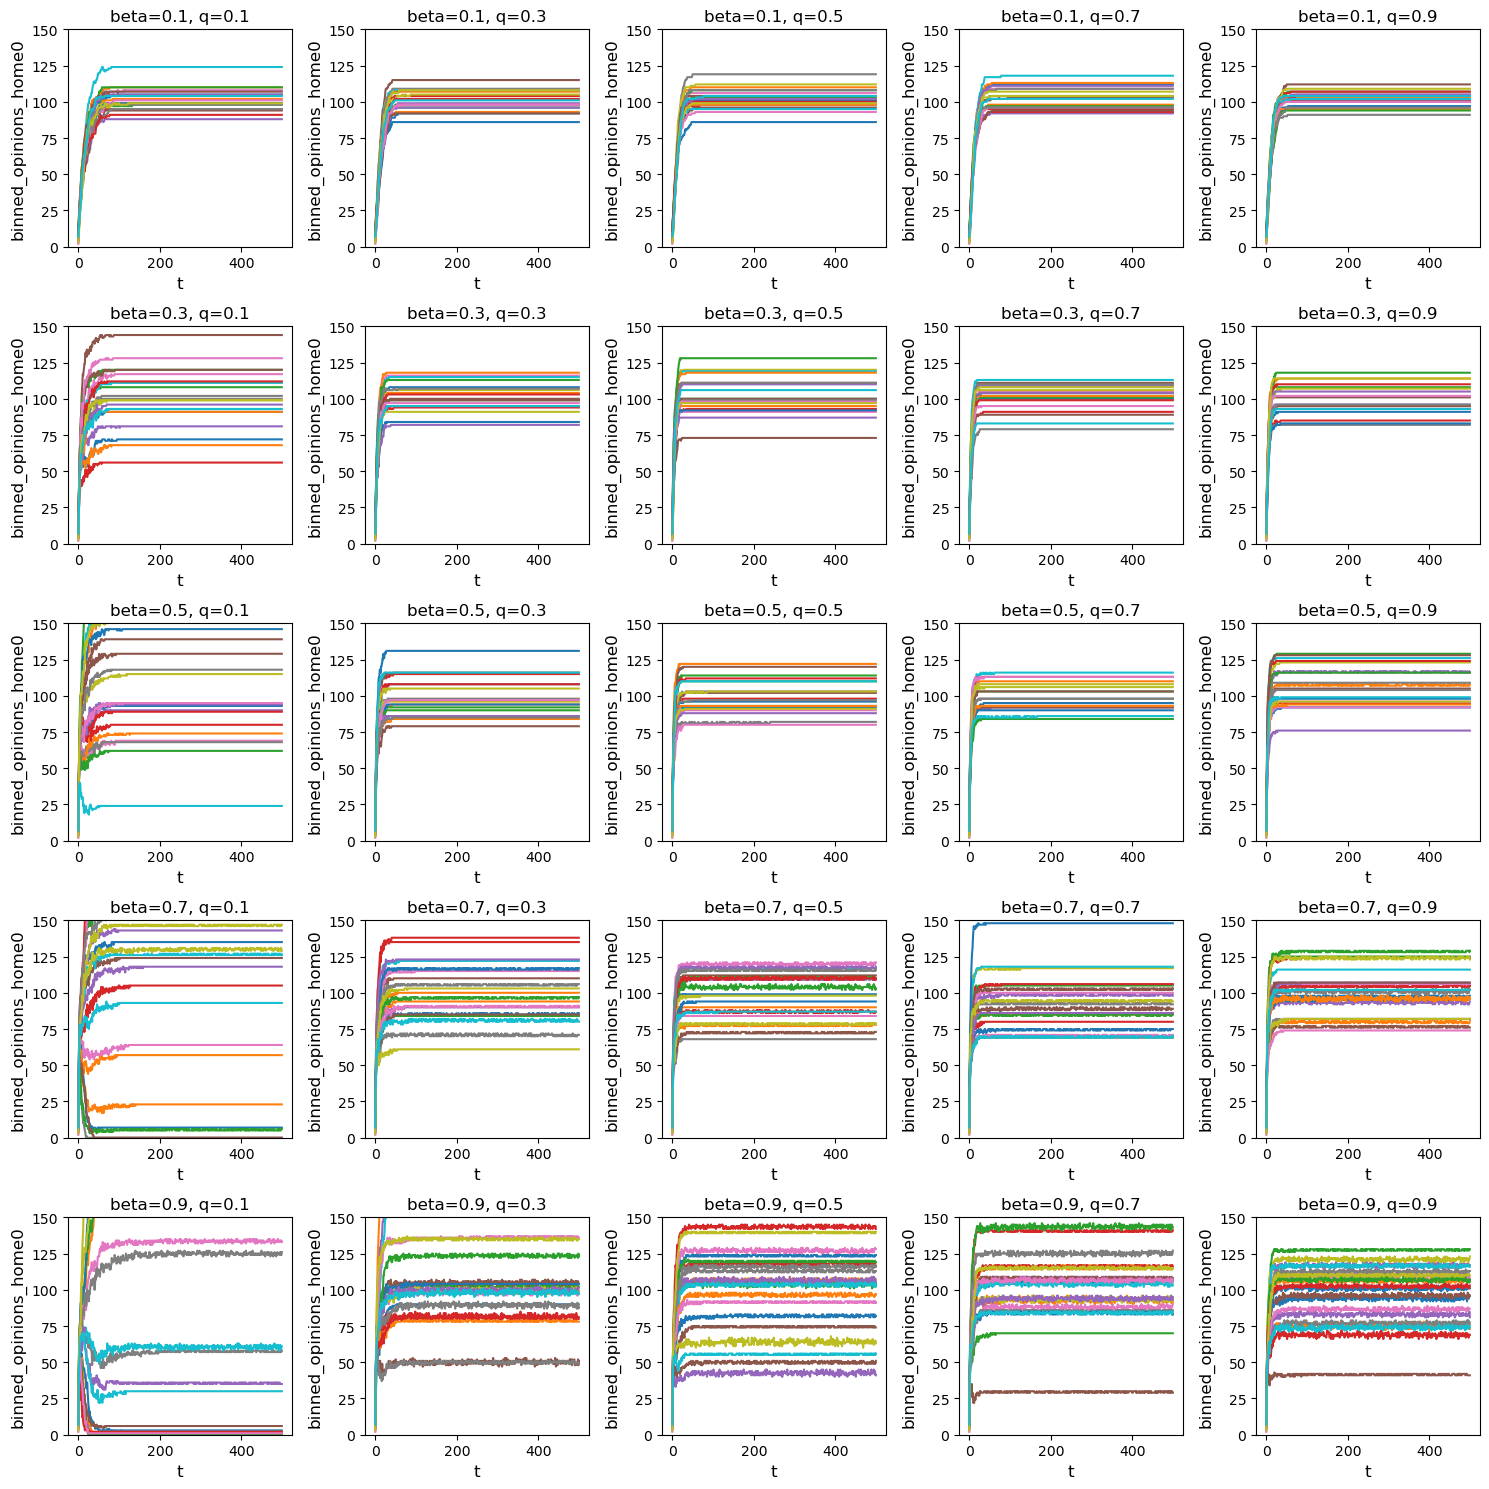

In [99]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot([results[it]['binned_opinions_home'][k][0] for k in range(len(results[it]['binned_opinions_home']))])
        ax.set_ylabel('binned_opinions_home0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,150))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


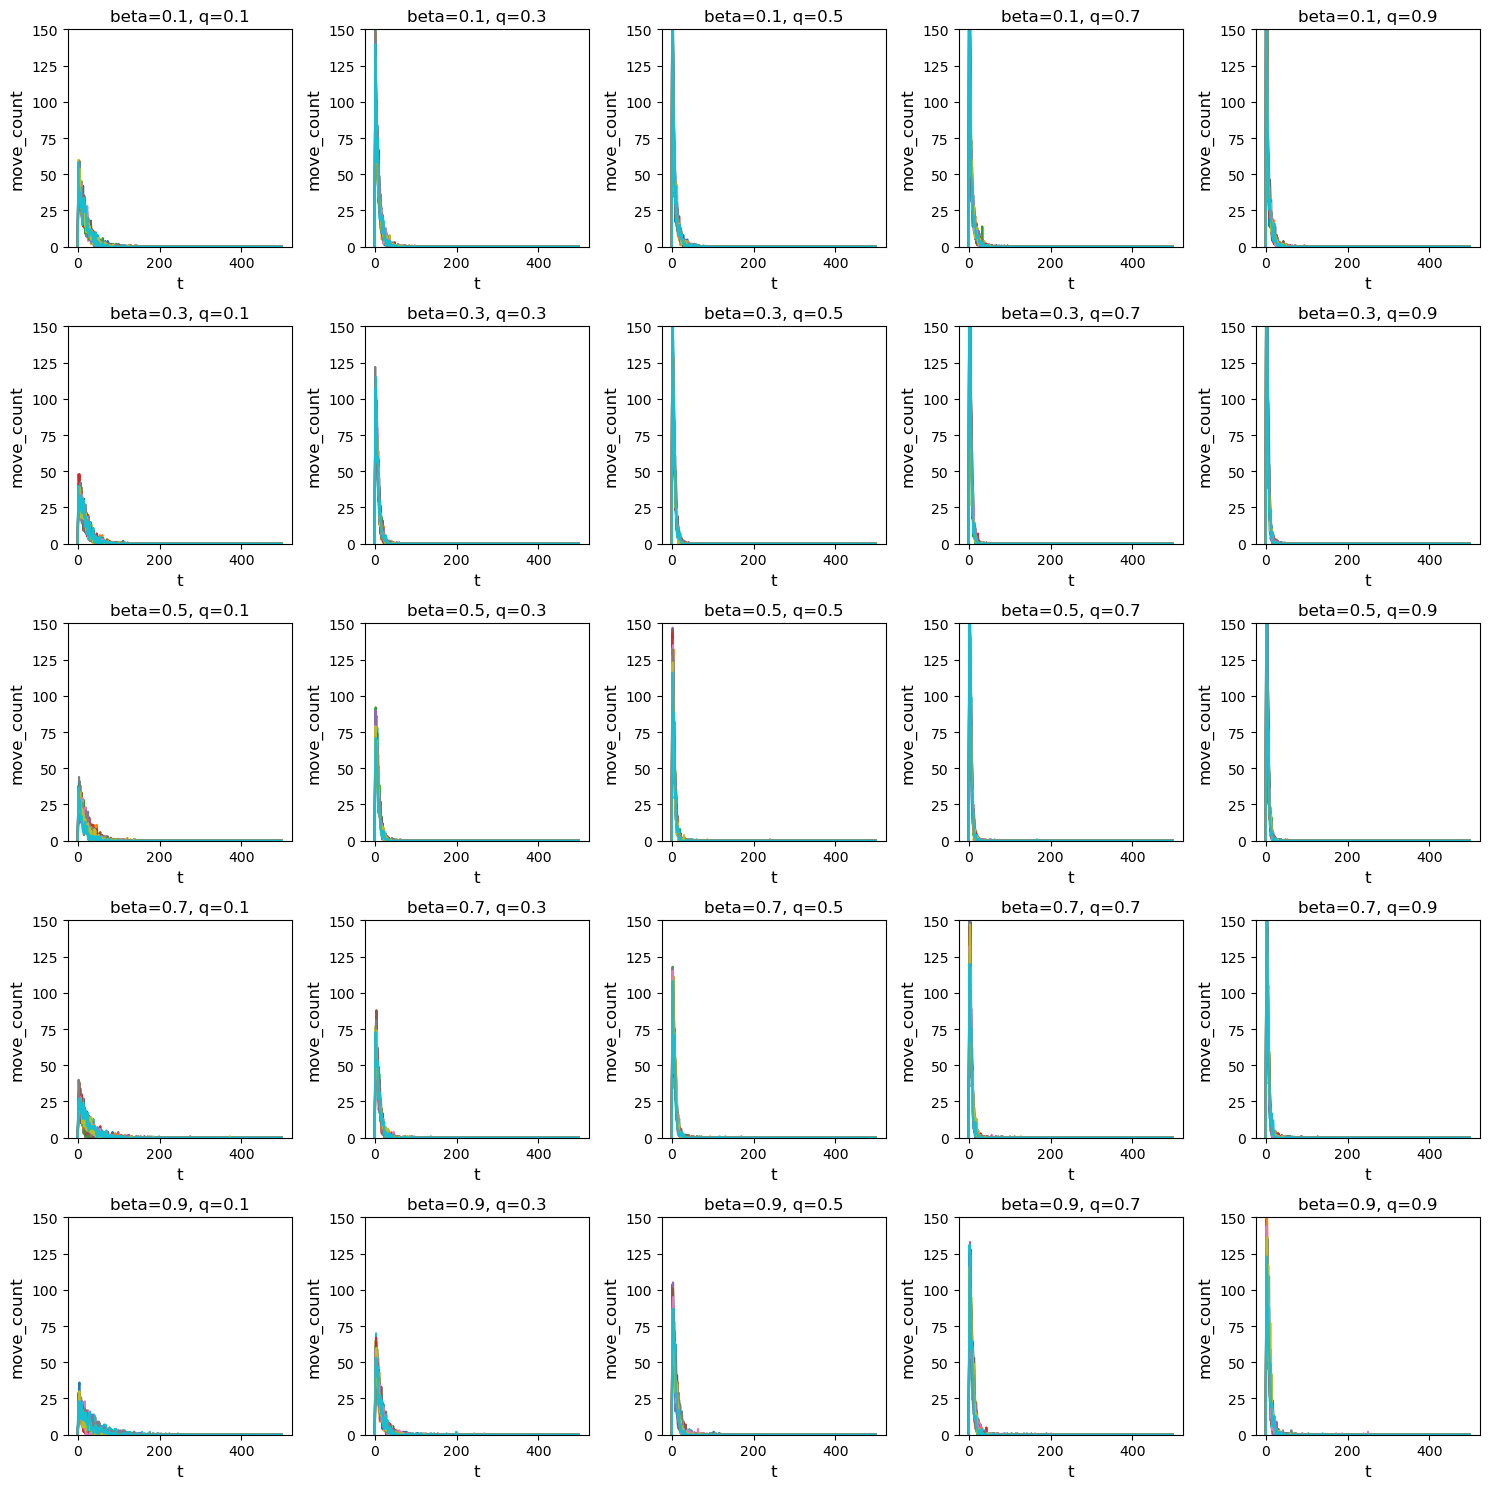

In [98]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot([results[it]['move_count'][k] for k in range(len(results[it]['binned_opinions_home']))])
        ax.set_ylabel('move_count',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,150))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


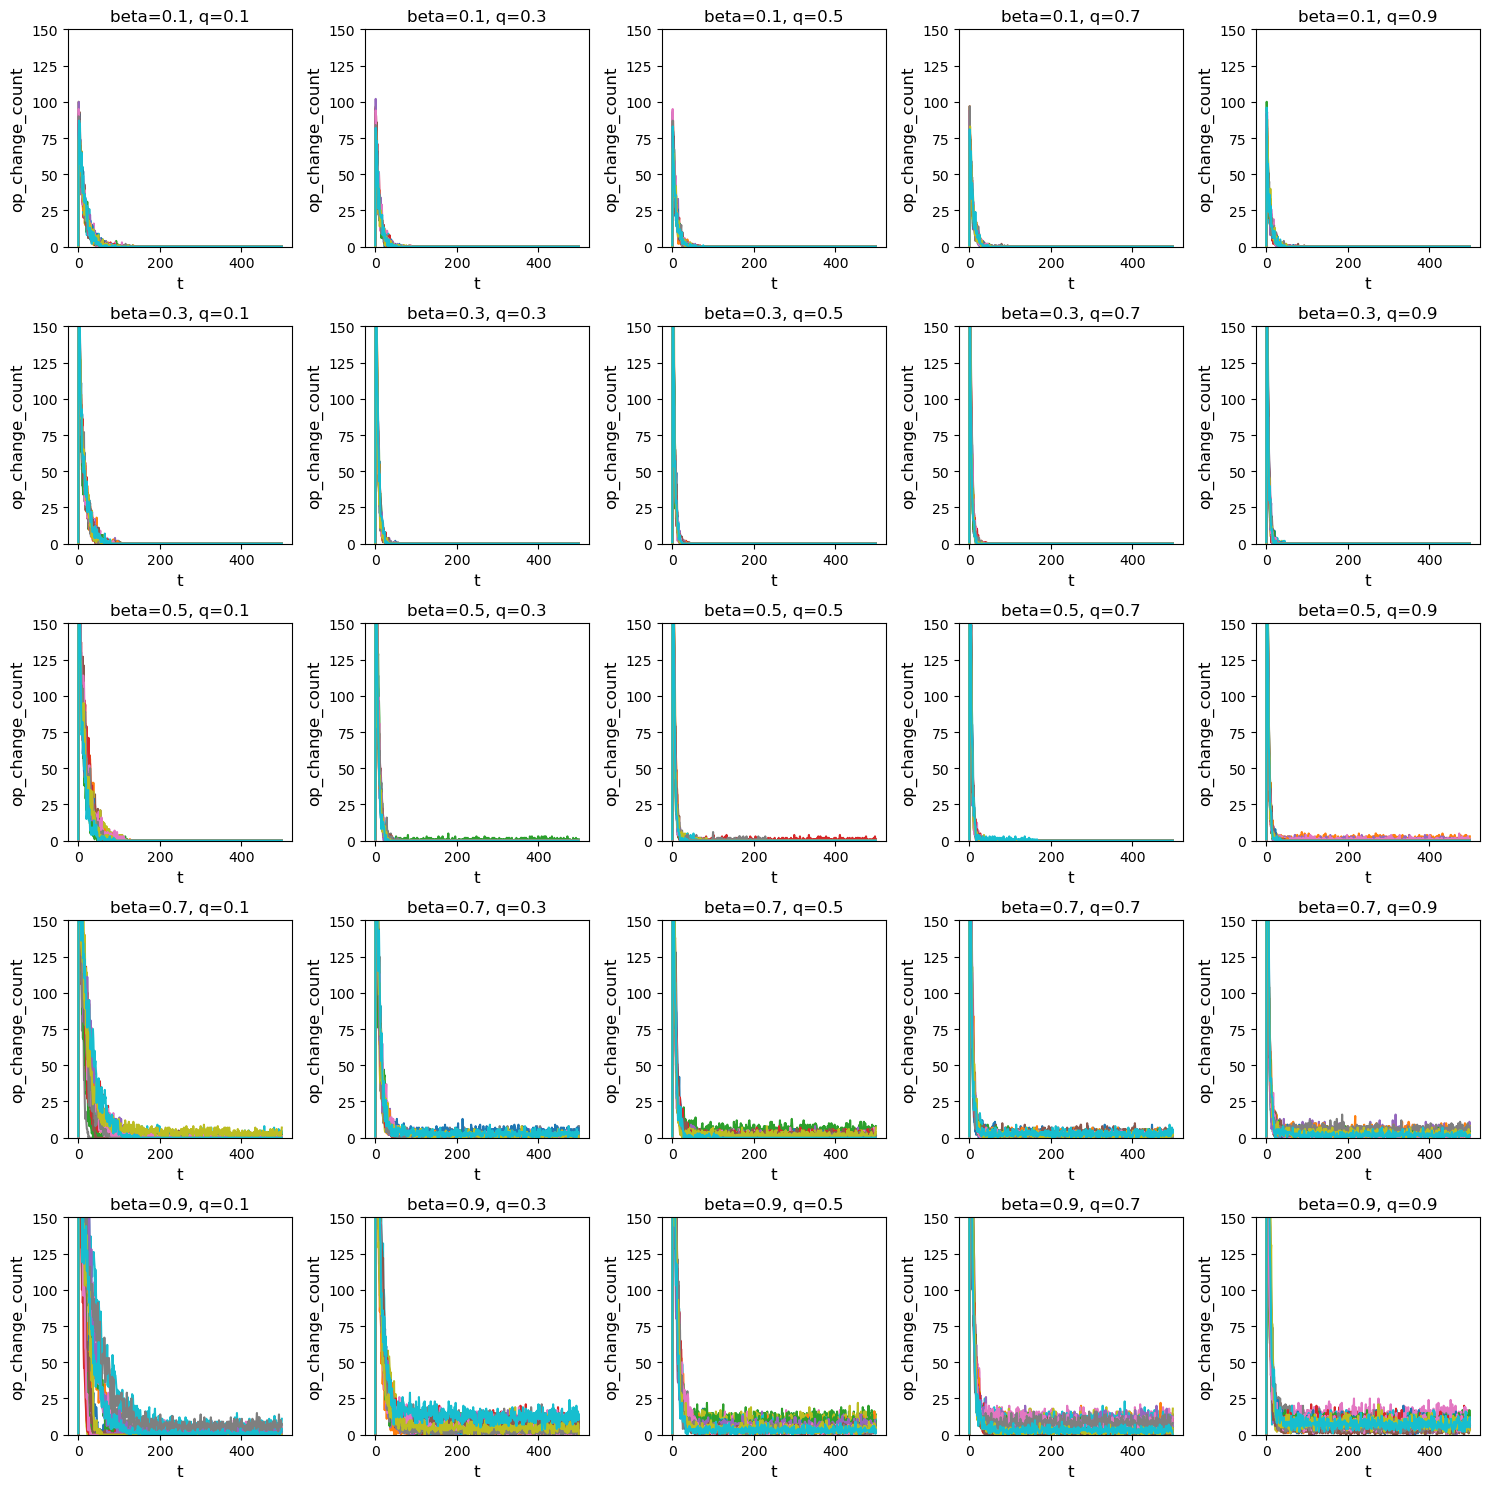

In [97]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas),len(qs), figsize=(15,15))
axes=axes.flatten()
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        results=data[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot([results[it]['op_change_count'][k] for k in range(len(results[it]['binned_opinions_home']))])
        ax.set_ylabel('op_change_count',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,150))
plt.tight_layout()
#plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


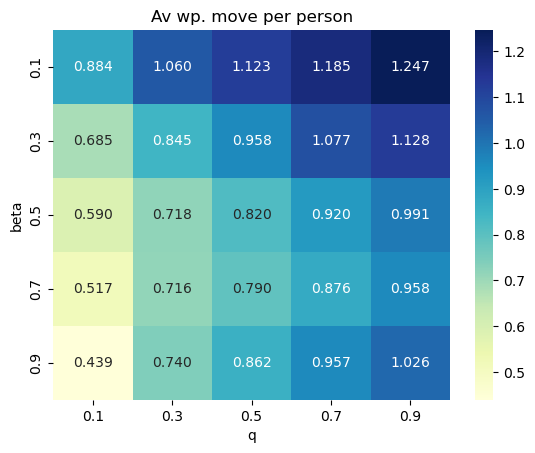

In [103]:
fd_mtx=np.zeros((5,5))
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        s = np.mean([np.sum(data[i][j][it]['move_count'])/1000 for it in range(iterations)])
        
        fd_mtx[i][j]=s
x = [f'{q:.1f}' for q in qs]
y = [f'{beta:.1f}' for beta in betas]
sns.heatmap(fd_mtx,xticklabels=x, yticklabels=y, cmap="YlGnBu", cbar=True,annot=True, fmt='.3f')

plt.xlabel("q")
plt.ylabel("beta")
plt.title("Av wp. move per person")
plt.show()

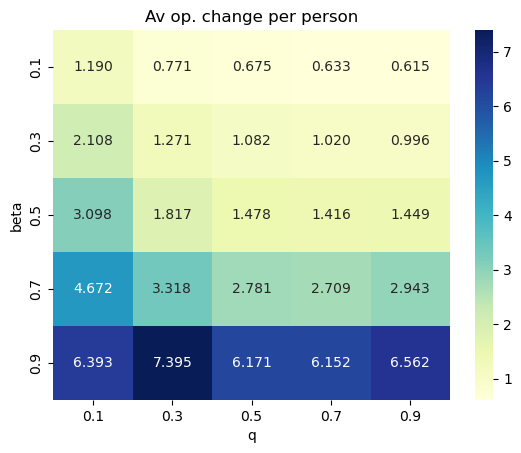

In [104]:
fd_mtx=np.zeros((5,5))
k=0
for i in range(0,len(betas)):
    for j in range(0,len(qs)):
        s = np.mean([np.sum(data[i][j][it]['op_change_count'])/1000 for it in range(iterations)])
        
        fd_mtx[i][j]=s
x = [f'{q:.1f}' for q in qs]
y = [f'{beta:.1f}' for beta in betas]
sns.heatmap(fd_mtx,xticklabels=x, yticklabels=y, cmap="YlGnBu", cbar=True,annot=True, fmt='.3f')

plt.xlabel("q")
plt.ylabel("beta")
plt.title("Av op. change per person")
plt.show()